# **EMAIL SPAM DETECTION WITH MACHINE LEARNING**



#Download **Dataset** here [EMAIL SPAM DETECTION](https://drive.google.com/file/d/19Yz5vBQ3T174xeSOOqVzw3rWWm39stsf/view?usp=share_link)

### Knowing about the Dataset

**Importing the Required Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings 

warnings.filterwarnings("ignore")

^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   --------------------------- ------------ 11.0/16.3 MB 57.5 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.3 MB 60.1 MB/s eta 0:00:01
   ---------------------------------------- 16.3/16.3 MB 30.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------- ------------------ 5.2/9.8 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 29.2 MB/s eta 0:00:00

   ---------------------------------------- 0/5 [patsy]
   ---------------------------------------- 0/5 [patsy]
   ---------------------------------------- 0/5 [patsy]
   ---------------------------------------- 0/5 [patsy]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [

**Reading informations in the Dataset**

In [9]:
data = pd.read_csv('spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


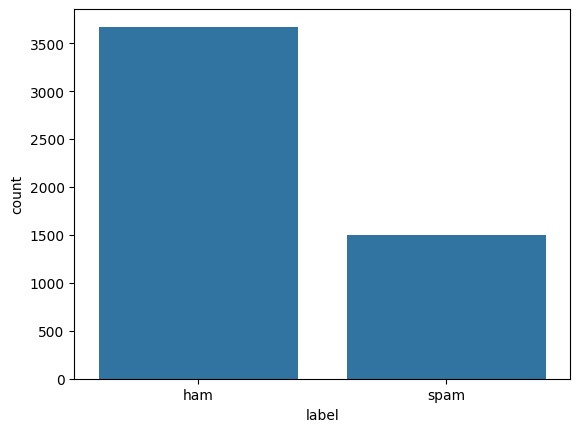

In [73]:
sns.countplot(x='label', data=data)
plt.show()

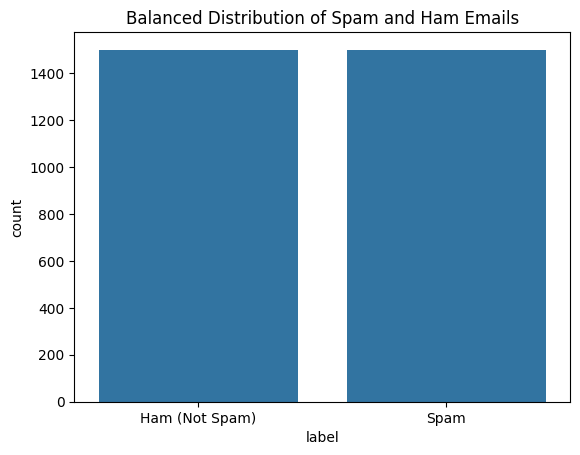

In [74]:
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine balanced data
balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.title("Balanced Distribution of Spam and Ham Emails")
plt.xticks(ticks=[0, 1], labels=['Ham (Not Spam)', 'Spam'])
plt.show()

In [75]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [76]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [77]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


**Checking for the classes in the Data**

In [15]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


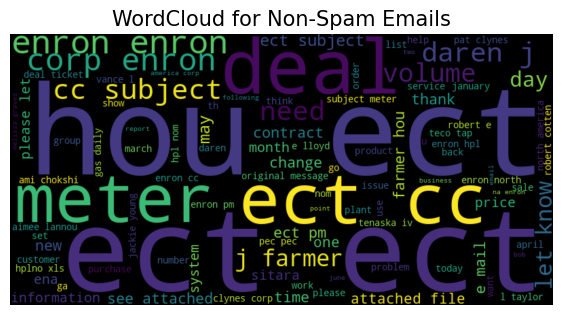

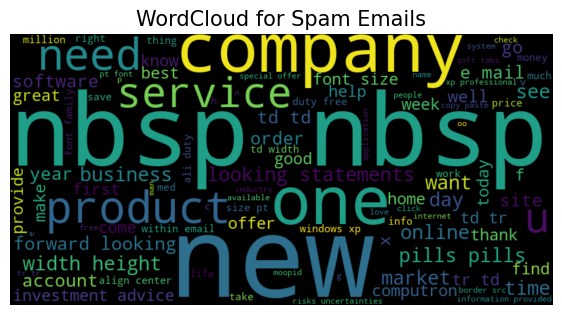

In [78]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    wc = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], typ='Spam')

In [79]:
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100  # Maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

train_Y = (train_Y == 'spam').astype(int)
test_Y = (test_Y == 'spam').astype(int)

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20,
    batch_size=32,
    callbacks=[lr, es]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5247 - loss: 0.6922 - val_accuracy: 0.6000 - val_loss: 0.6728 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7671 - loss: 0.5121 - val_accuracy: 0.8700 - val_loss: 0.3714 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9163 - loss: 0.2649 - val_accuracy: 0.8817 - val_loss: 0.3189 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9215 - loss: 0.2424 - val_accuracy: 0.8817 - val_loss: 0.3185 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9311 - loss: 0.2178 - val_accuracy: 0.8233 - val_loss: 0.4460 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8758 - loss: 0.3106 - val_accuracy: 0.8950 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9496 - loss: 0.1686 - val_acc

In [82]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 0.1387
Test Loss : 0.16994121670722961
Test Accuracy : 0.9700000286102295


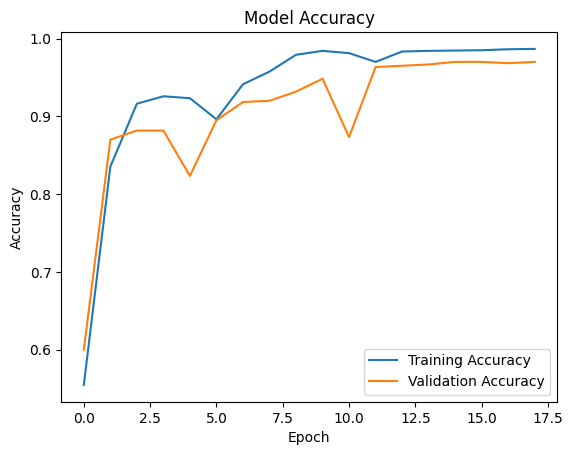

In [83]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:

texts = [
    "Hey, are we still meeting for lunch at 12?",
    "Don't forget to submit the report by 5 PM today.",
    "I'll call you back in 10 minutes.",
    "Happy birthday! Hope you have a great day!",
    "Can you please send me the updated project file?",
    "Thanks for your help earlier. Much appreciated!",
    "Meeting rescheduled to tomorrow at 3 PM.",
    "See you at the gym later!",
    "Good luck on your exam tomorrow!",
    "Let's catch up this weekend!"
]

sequences = tokenizer.texts_to_sequences(texts)
padded_seq = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
preds = model.predict(padded_seq)

for i, pred in enumerate(preds):
    label = "Spam" if pred[0] > 0.5 else "Ham"
    print(f"Text {i + 1}: {label} ({pred[0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Text 1: Spam (0.7788)
Text 2: Spam (0.7788)
Text 3: Spam (0.7788)
Text 4: Spam (0.7788)
Text 5: Spam (0.7788)
Text 6: Ham (0.0036)
Text 7: Spam (0.7788)
Text 8: Spam (0.7788)
Text 9: Spam (0.7788)
Text 10: Spam (0.7788)


In [96]:
X = data['text']
label = data['label']
data


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [98]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000, min_df=2, max_df=0.9)
X_transformed = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, label, test_size=0.2, random_state=42, stratify=label)

model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(classification_report(y_test, y_pred))
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

if train_accuracy - test_accuracy > 0.1:
    print("The model is experiencing overfitting. Consider reducing complexity.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("The model is experiencing underfitting.")
else:
    print("The model is performing well.")

Accuracy: 95.17%
Precision: 95.42%
Recall: 95.17%
F1 Score: 95.23%
              precision    recall  f1-score   support

         ham       0.98      0.95      0.97       735
        spam       0.88      0.96      0.92       300

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035

Training Accuracy: 96.76%
Test Accuracy: 95.17%
The model is performing well.


In [100]:
index = 123
sample_message = data.loc[index, 'text']
actual_label = data.loc[index, 'label']

sample_transformed = vectorizer.transform([sample_message])

predicted_label = model.predict(sample_transformed)[0]

print(f"Original Message: {sample_message}")
print(f"Actual Category: {actual_label}")
print(f"Predicted Category: {predicted_label}")

if predicted_label == actual_label:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")

Original Message: Subject: hpl meter # 980417 hpl / kmid - seven oaks
daren :
on 11 / 30 / 99 , the above meter has recorded flow of 26 mmbtus . there were no
deals at this meter during november 1999 or december 1999 . logistics needs
approval to writeoff these volumes to unaccounted for gas . please print ,
sign , and return original to clem cernosek .
approval to writeoff the volumes to unaccounted for gas loss
thanks ,
clem cernosek
Actual Category: ham
Predicted Category: ham
The prediction is correct!


In [103]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('spam_nb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [107]:
with open('tokenizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('spam_nb_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
texts = [
    "Hey, are we still meeting for lunch at 12?",
    "Don't forget to submit the report by 5 PM today.",
    "I'll call you back in 10 minutes.",
    "Happy birthday! Hope you have a great day!",
    "Can you please send me the updated project file?",
    "Thanks for your help earlier. Much appreciated!",
    "Meeting rescheduled to tomorrow at 3 PM.",
    "See you at the gym later!",
    "Good luck on your exam tomorrow!",
    "Let's catch up this weekend!"
]


for i, message in enumerate(texts):
    vect_msg = vectorizer.transform([message])
    pred = model.predict(vect_msg)[0]
    proba = model.predict_proba(vect_msg)[0].max()
    print(f"Text {i+1}: {pred} ({proba:.4f})")

Text 1: ham (0.9250)
Text 2: ham (0.7441)
Text 3: spam (0.5600)
Text 4: ham (0.5208)
Text 5: ham (0.9390)
Text 6: ham (0.9265)
Text 7: ham (0.9856)
Text 8: ham (0.7036)
Text 9: ham (0.8130)
Text 10: ham (0.6693)
